# 用matplotlib和OpenCV制作动画视频

`matplotlib.animation`中提供了制作动画视频的类，但是这些类都是首先将图表保存为图像文件，然后使用视频工具生成视频。本文介绍使用OpenCV中的`VideoWriter`直接将图表的绘图内存保存为视频文件。

In [65]:
%matplotlib inline
import pylab as pl
import numpy as np
import cv2
from matplotlib.collections import LineCollection

In [49]:
from scipy.spatial.distance import squareform, pdist

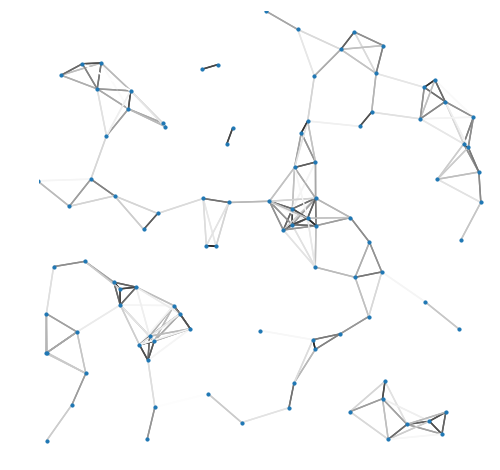

In [87]:
vw = None
N = 100
x, y = np.random.uniform(-2, 2, (2, N))
vx, vy = np.random.randn(2, N) * 0.01
fig, ax = pl.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
scatter = ax.scatter(x, y, 10, zorder=100)
lc = LineCollection([[(0, 0), (1, 1)]])
lc.set_cmap("gray")
ax.add_collection(lc)
fig.canvas.draw()
ax.axis("off")
canvas_map = np.asarray(fig.canvas.renderer._renderer)[:, :, 2::-1]
arrs = []
for i in range(300):
    x += vx
    y += vy
    vx[(x < -2) | (x > 2)] *= -1
    vy[(y < -2) | (y > 2)] *= -1
    scatter.set_offsets(np.c_[x, y])
    
    points = np.c_[x, y]
    dist = squareform(pdist(points))
    i0, i1 = np.where(dist < 0.5)
    mask = i0 != i1
    i0 = i0[mask]
    i1 = i1[mask]
    lines = np.concatenate((points[i0], points[i1]), axis=-1).reshape(-1, 2, 2)
    lc.set_segments(lines)
    length = ((lines[:, 1, :] - lines[:, 0, :])**2).sum(axis=-1)**0.5
    lc.set_array(length)
    fig.canvas.draw()
    if vw is None:
        vw = cv2.VideoWriter("movie.avi", cv2.VideoWriter_fourcc(*"MPEG"), 25, fig.canvas.get_width_height())
    vw.write(canvas_map)
    
vw.release()